# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнил студент гр. 9382 Савельев Илья, вариант 33.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Общий вид задачи Коши:

\begin{cases}
        f(x, y, y', y'', ...y^{(n)}) = 0\\
        y(x_0) = y_0\\
        y'(x_0) = y_1\\
        y''(x_0) = y_2\\
        ...\\
        y^{(n-1)}(x_0) = y_{n-1}
\end{cases}
  
Данная задача подразумевает собой поиск частного решения уравнения y = $\varphi$(x) из числа общих, удовлетворяющего некоторым условиям.

Краевая задача — задача о нахождении решения заданного дифференциального уравнения (системы дифференциальных уравнений), удовлетворяющего краевым условиям в концах интервала или на границе области.

Метод половиного деления позволяет исключать в точности половину интервала $|a, b|$ на каждой итерации. После вычисления значения функции в середине интервала $f(с_{mid})$, где $с_{mid} = (a - b)\space/\space2$, одна часть интервала отбрасывается, по следующему правилу если $f(с_{mid}) > f(с_0)$, где $с_0$ значение при котором $f(с_0)$ равно искомому значению функции, то $b = с_{mid}$, иначе $a = с_{mid}$, так продолжается до тех пор пока  не выполниться условие $|f(a) - f(b)| < \epsilon$.

# Постановка задачи

Дано дифференциальное уравнение:

   $y''=f(x,y),\space\space a < x < b\space\space\space(1)$
   
и граничные условия
   
   $y(a) = y_a,\space\space y(b) = y_b\space\space\space(2)$
   
Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

   $y(a) = y_a,\space\space y'(a) = h\space\space\space(3)$
    
План решения основан на многократном решении задачи Коши (1), (3).
Значение решения задачи Коши при 𝑥 = 𝑏 является функцией от ℎ.
Задача сводится к отысканию такого значения переменной ℎ, при ко-
тором выполнено условие на правом конце отрезка, т.е. должно выполняться

   $y(b,h) = y_b\space\space\space(4)$
   
Это уравнение с одним неизвестным ℎ.

Для его решения можно применить стандартный метод половинного
деления.
   
    

## Выполнение работы

Начальные данные

$y'' = sin(x-y^2)$

𝑎 = 0, 𝑏 = 2

$y_a = 3$, $y_b = -3$

$ \begin{cases}
    y'' = sin(x-y^2)\\\\
     y(𝑎) = 3\\\\
     y'(𝑎) = h
      \end{cases}$

1. Задаем наугад число ℎ0, решаем задачу Коши.

y(2, -2) = -0.9093653220172153


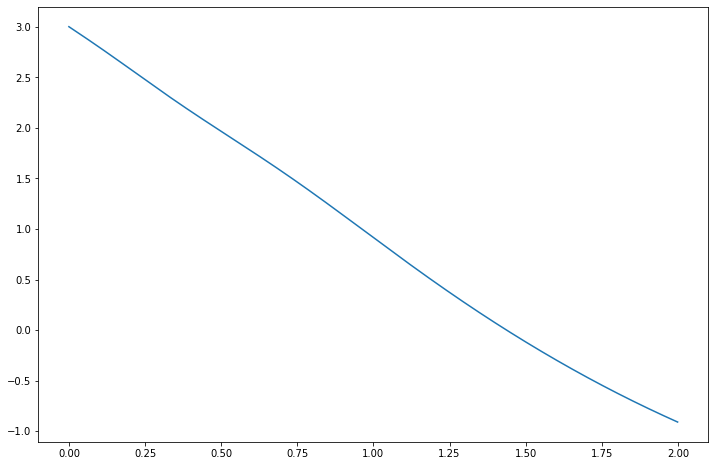

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Начальные данные
y_a = 3.
y_b = -3.
h_0 = -2

# Функция, задающая систему дифференциальных уравнений
def f(Y, x):
    return [Y[1], np.sin(x-Y[0]**2)]

# Решение системы
result = integrate.odeint(f, [y_a, h_0], np.arange(0, 2, 0.001))

# Результат с выбранной на угад h
print(f"y(2, {h_0}) = {result[-1, 0]}")

# График
plt.figure(figsize=(12, 8))
plt.plot(np.arange(0, 2, 0.001), result[:, 0])
plt.show()

2. В предыдущем пункте у нас получилось 𝑦(𝑏, ℎ0) > 𝑦𝑏, выберем шаг ∆ℎ и решим несколько раз задачу Коши пока не получим неравенство 𝑦(𝑏, ℎ𝑚) < 𝑦𝑏, причём должно выполняться 𝑦𝑏 < 𝑦(𝑏, ℎ1) < 𝑦(𝑏, ℎ0).

In [2]:
h_m = h_0
y_m = result[-1, 0]

while y_b < y_m:
    # Уменьшаем значение h
    h_m -= 0.001
    # Решение системы
    y_m = integrate.odeint(f, [y_a, h_m], np.arange(0, 2, 0.001))[-1, 0]

# Находи значения на шаг назад
h_m_1 = h_m + 0.001
y_m_1 = integrate.odeint(f, [y_a, h_m_1], np.arange(0, 2, 0.001))[-1, 0]

print(f"y(2, {h_m_1}) = {y_m_1}")
print(f"y(2, {h_m}) = {y_m}")

y(2, -3.0209999999998876) = -2.9991080739501683
y(2, -3.0219999999998874) = -3.0012463893680894


3. В предыдущем пункте нам удалось "зажать" ℎ ∈ $(ℎ_{𝑚−1}; ℎ_𝑚)$. Теперь применим метод половиного деления пока не выполнится неравенство $\space\space\space\space\space\space\space\space\space$ |𝑦(𝑏, $ℎ_𝑚$)−𝑦(𝑏, $ℎ_{𝑚−1}$)| < 0.001.

C помощь метода половинного деления находим h = -3.0219687499998873, при котором значение функции равно -3.0011795616022012


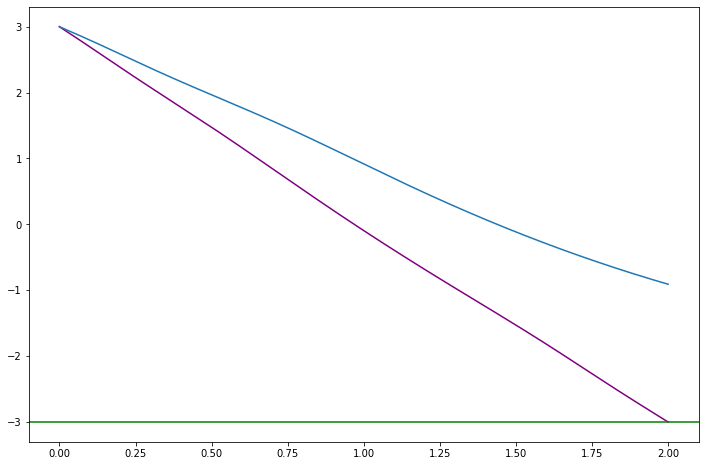

In [3]:
counter = 0 
y_half = 0

while abs(y_m - y_m_1) >= 0.0001:
    # Делим отрезок пополам 
    h_half = (h_m + h_m_1) / 2
    # Решение системы
    y_half = integrate.odeint(f, [y_a, h_half], np.arange(0, 2, 0.001))
    
    # Выбираем с какой стороны перенести границы
    if(y_half[-1,0] > y_b):
        h_m = h_half
        y_m = y_half[-1,0]
    else:
        h_m_1 = h_half
        y_m_1 = y_half[-1,0]
    # Если задача не имеет решения, ограничиваем число шагов в цикле
    if counter > 1000:
        break
    counter += 1

print(f"C помощь метода половинного деления находим h = {h_half}, при котором значение функции равно {y_half[-1, 0]}")

# Графики
plt.figure(figsize=(12, 8))
plt.plot(np.arange(0, 2, 0.001), y_half[:, 0], color="purple")
plt.plot(np.arange(0, 2, 0.001), result[:, 0])
plt.axhline(y = -3, color = 'green')
plt.show()

На графике фиолетовым цветом изображенно решение задачи при h = -3.0219687499998873, сином цветом изображенно решение при h = -2, выбранном наугад.

## Выводы

В результате выполнения практической работы, решена краевая задача для уравнения II-го порядка путём многократного решения задачи Коши. Так же был изучен и применем метод половиного деления.